# Bibliotecas:

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Dados:

In [2]:
dados = pd.read_csv("hoteis.csv")

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [6]:
#Correlação: Medir relação linear entre variáveis
corr = dados.corr()

In [8]:
corr["Preco"]

,Preco
Estrelas,0.401099
ProximidadeTurismo,-0.697142
Capacidade,0.531866
Preco,1.000000


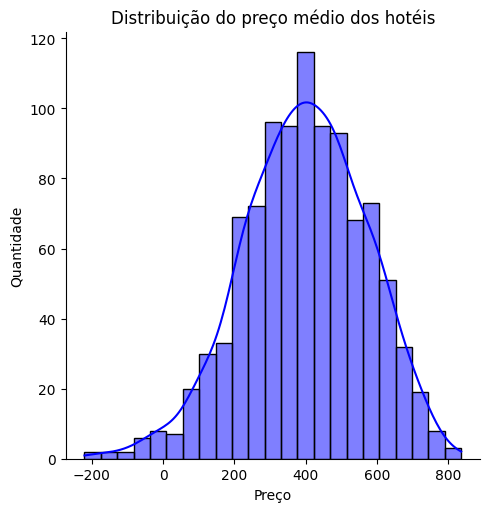

In [12]:
#Distribuição da variavél Preco
sns.displot(dados["Preco"],kde=True,color="blue")
plt.title('Distribuição do preço médio dos hotéis')
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.show()

# Análise da Correlação entre Estrelas e o Preço:

In [41]:
#Definindo X e Y para o train_test_split:
y = dados["Preco"]
x = dados.drop(columns='Preco')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

df_train = pd.DataFrame(data=x_train)
df_train['Preco']= y_train

In [42]:
modelo_0 = ols('Preco ~Estrelas',data = df_train).fit()

In [43]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     150.9
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.54e-31
Time:                        01:45:32   Log-Likelihood:                -4528.1
No. Observations:                 700   AIC:                             9060.
Df Residuals:                     698   BIC:                             9069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    240.0978     13.772     17.434      0.0

In [44]:
#R²:
print(modelo_0.rsquared)

0.17775997575293379


In [45]:
#Residuos:
modelo_0.resid

,0
541,276.528311
440,71.971614
482,134.188413
422,-159.439144
778,-302.087748
...,...
106,125.860145
270,-135.265133
860,-256.338882
435,4.693393


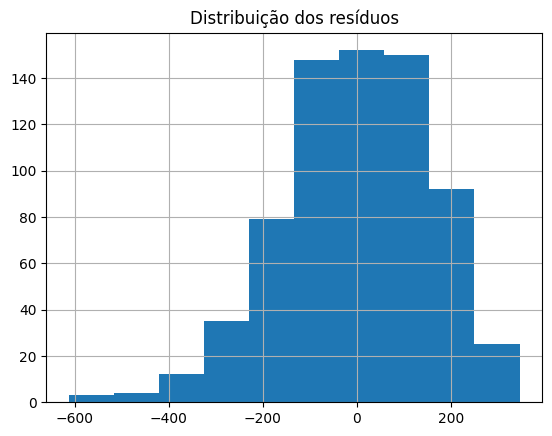

In [46]:
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

In [47]:
#Definindo o Y previsto
y_predict = modelo_0.predict(x_test)


In [48]:
#R² previsto:
print("Predição de R²: ",r2_score(y_test,y_predict))

Predição de R²:  0.11568993711790754


# Analisando correlação entre as variáveis:

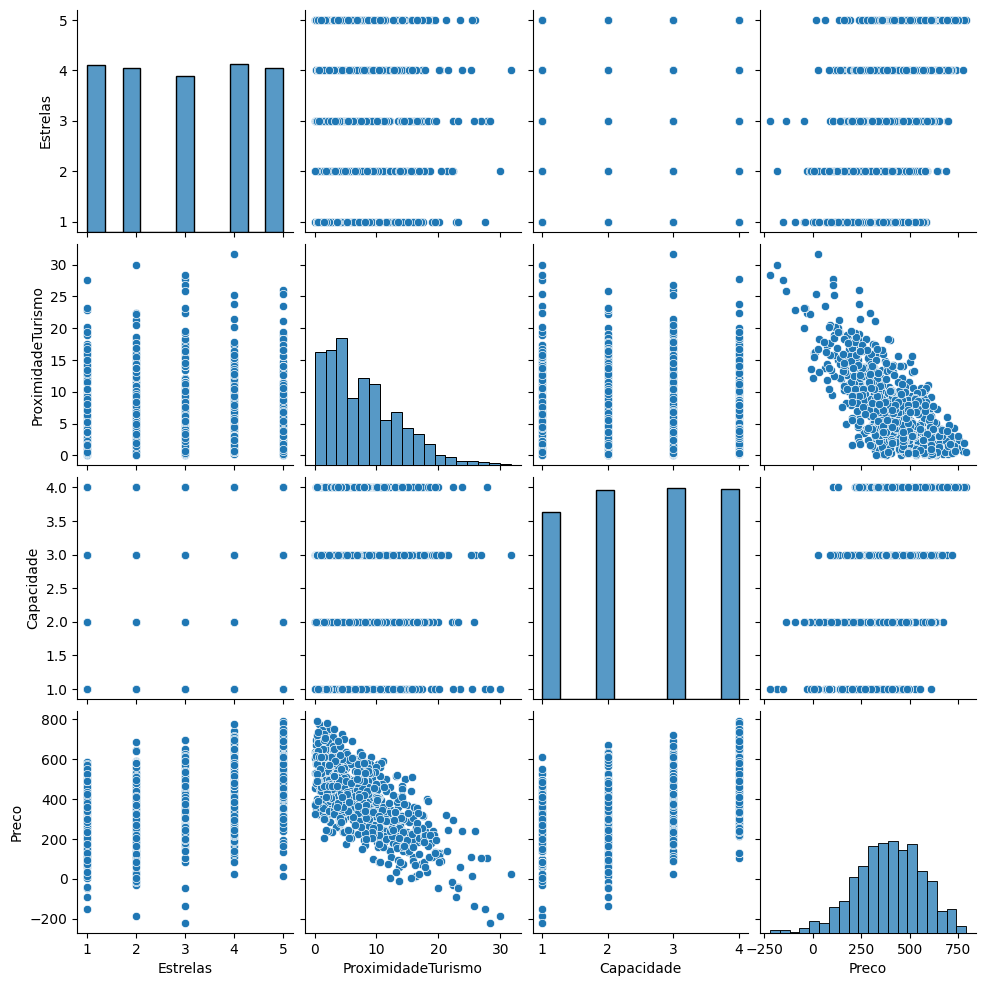

In [49]:
sns.pairplot(df_train)

In [50]:
dados.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

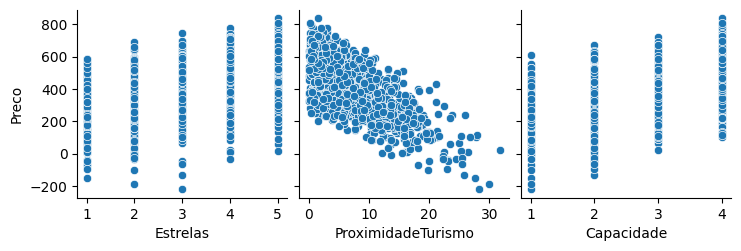

In [51]:
#Olhando apenas y_vars = 'Preco'
sns.pairplot(dados,y_vars='Preco',x_vars=['Estrelas', 'ProximidadeTurismo', 'Capacidade'])

In [52]:
#Adicionando o constante:
x_train = sm.add_constant(x_train)
x_train.head()

,const,Estrelas,ProximidadeTurismo,Capacidade
541,1.0,4,1.464408,4
440,1.0,4,4.026255,2
482,1.0,3,4.012978,4
422,1.0,2,10.156653,1
778,1.0,5,18.081439,2


In [53]:
x_train.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [54]:
#Criando modelo de regressão (sem fórmula):saturadp
modelo_1 = sm.OLS(y_train,x_train[['const','Estrelas', 'ProximidadeTurismo', 'Capacidade']]).fit()

#Criando modelo de regressão sem as Estrelas:
modelo_2 = sm.OLS(y_train,x_train[['const','ProximidadeTurismo', 'Capacidade']]).fit()

#Criando modelo de regressão sem as capacidades:
modelo_3 = sm.OLS(y_train,x_train[['const','ProximidadeTurismo','Estrelas']]).fit()

In [55]:
#Resumo modelo 1:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2791.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:45:40   Log-Likelihood:                -3698.0
No. Observations:                 700   AIC:                             7404.
Df Residuals:                     696   BIC:                             7422.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                191.7119      6

In [56]:
#Resumo modelo 2:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.48e-212
Time:                        01:45:40   Log-Likelihood:                -4106.8
No. Observations:                 700   AIC:                             8220.
Df Residuals:                     697   BIC:                             8233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                353.6340      9

In [57]:
#Resumo modelo 3:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     659.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.89e-161
Time:                        01:45:40   Log-Likelihood:                -4224.9
No. Observations:                 700   AIC:                             8456.
Df Residuals:                     697   BIC:                             8470.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                409.1861     10

In [58]:
#Parametros utilizados por cada modelo:
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
4
3
3


In [59]:
#Comparação entre os modelos utilizando o R²:
print("R²")
print("Modelo 0: ",modelo_0.rsquared)
print("Modelo 1: ",modelo_1.rsquared)
print("Modelo 2: ",modelo_2.rsquared)
print("Modelo 3: ",modelo_3.rsquared)

R²
Modelo 0:  0.17775997575293379
Modelo 1:  0.9232625292194134
Modelo 2:  0.7532991269421774
Modelo 3:  0.6542080651896894


Para a resolução deste exercicio escolheria o Modelo 1, pois é a que a presenta uma maior correlação e R² quando comparada a coluna preço.